# <font color='darkorange'>Classification: Decision Tree Classifier
---
</font>

*@ Jorge Alberto Tovar Jiménez*

Es un modelo de aprendizaje supervisado que permite hacer clasificaciones binarias y también multiclase, funciona dividiendo el DataFrame en diferentes nodos y ramas: 

- Nodos internos: realizan tests sobre cada elemento hasta llegar a un nodo final.
- Nodos externos: se encargan de asignar las clases. 
- Ramas: son los resultados de cada test de un nodo interno.

Es importante definir una `max_depth` apropiada para el árbol y la cantidad de `min_samples_leaf` con la que se va a trabajar, así como el `random_state` al momento de hacer el split.  Otro factor importante es porcentaje de datos para el test (*`test_size`*) en el split.

En este tipo de modelos es posible tener overfitting.

Problema: Clasificar el tipo de medicina que se debe suministrar a un paciente.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./medicine.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Crear nArray X:

In [3]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:2]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093]])

Crear Y:

In [4]:
y = df['Drug']
print(y.value_counts())

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


Crear Splits:

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(27)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70, stratify=y, shuffle=True)
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size: ', X_test.shape,  y_test.shape)
y_test.value_counts()

Train set size: (140, 5) (140,)
Test set size:  (60, 5) (60,)


drugY    27
drugX    16
drugA     7
drugC     5
drugB     5
Name: Drug, dtype: int64

Crear modelo:

In [6]:
from sklearn.tree import DecisionTreeClassifier

modeloArbol = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)
modeloArbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

Entrenar:

In [7]:
modeloArbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

Hacer Test:

In [8]:
yhat = modeloArbol.predict(X_test)
yhat[:5]

array(['drugA', 'drugX', 'drugY', 'drugY', 'drugA'], dtype=object)

Evaluaciones:

In [9]:
from sklearn import metrics


print(f'Train set Accuracy: {round((metrics.accuracy_score(y_train, modeloArbol.predict(X_train)))*100,2)} %')
print(f'Test set Accuracy: : {round((metrics.accuracy_score(y_test, yhat))*100,2)} %')

Train set Accuracy: 100.0 %
Test set Accuracy: : 98.33 %


Crear nuevas predicciones:

In [10]:
print(modeloArbol.predict([[22,1,1,1,15.335]])[0])
print(modeloArbol.predict([[57,0,0,0,3.091]])[0])
print(modeloArbol.predict([[17,1,0,1,8.091]])[0])
print(modeloArbol.predict([[32,1,1,1,13.091]])[0])
print(modeloArbol.predict([[52,0,2,0,23.091]])[0])
print(modeloArbol.predict([[9,0,1,0,11.091]])[0])

drugY
drugB
drugA
drugX
drugY
drugC


Visualización del árbol:

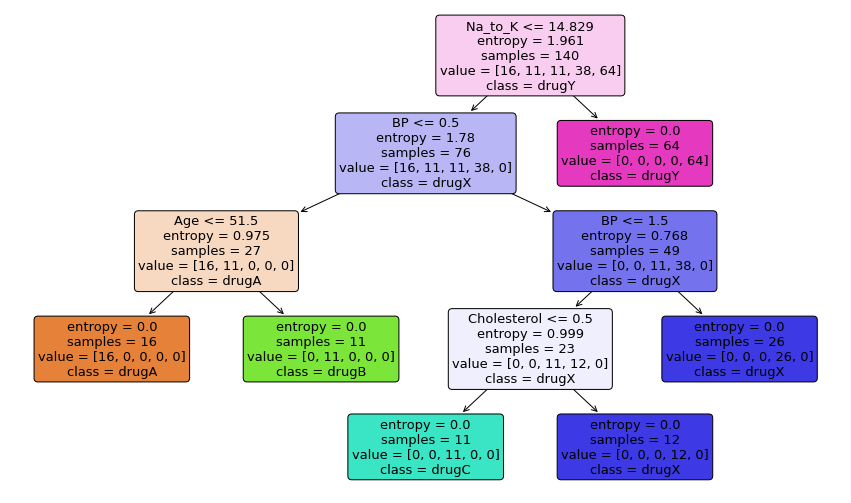

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,9))

plot_tree(modeloArbol, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=modeloArbol.classes_, filled=True, rounded=True, fontsize=13)
plt.show()

Gráfica de datos reales vs predicciones:

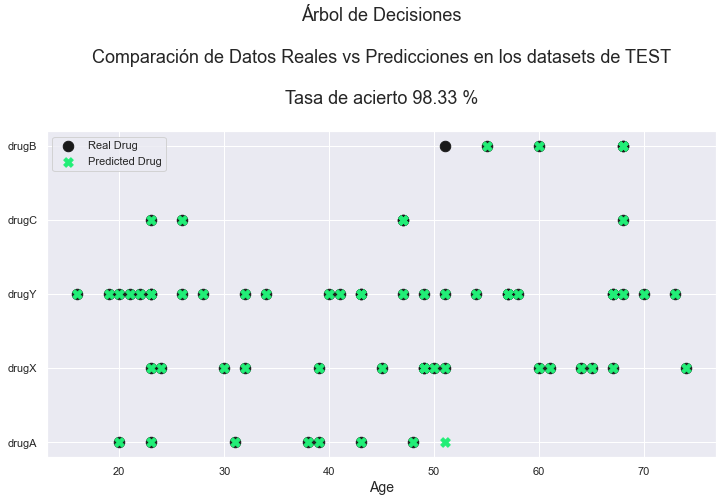

In [12]:
import seaborn as sns
sns.set()

plt.figure(figsize=(12,6))
real = plt.scatter(X_test[:,0], y_test, c='k', s=110)
predict = plt.scatter(X_test[:,0], yhat, c='#2e7', marker='X', s=90)
plt.legend([real, predict], ['Real Drug', 'Predicted Drug'])
plt.title(f'Árbol de Decisiones\n\nComparación de Datos Reales vs Predicciones en los datasets de TEST\n\nTasa de acierto {round((metrics.accuracy_score(y_test, yhat))*100,2)} %\n', fontdict={'size':'18'})
plt.xlabel('Age', fontdict={'size':'14'})
plt.show();